> ## **Métodos Computacionales II - Taller #3**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

---

In [1]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

>**Sección 2.9.3**

---

**1.** Sea el sistema autónomo definido por:

$$\dot{q} = f(q, p)$$

$$\dot{p} = g(q, p)$$

Los puntos del espacio de fase donde el flujo es estacionario se denominan puntos fijos tal que: $f(q_{0}, p_{0}) = 0$. Muestre que la estabilidad de los estados mecánicos definidos por esos puntos conduce a la siguiente ecuación matricial:

$$\frac{d\mathbf{E}}{dt} = \mathbf{ME},$$

donde $\mathbf{M}$ se denomina matriz de estabilidad:

$$\begin{pmatrix}
\dfrac{\partial f(q_{0}, p_{0})}{\partial q} & \dfrac{\partial f(q_{0}, p_{0})}{\partial p} \\
\dfrac{\partial g(q_{0}, p_{0})}{\partial q} & \dfrac{\partial g(q_{0}, p_{0})}{\partial p}
\end{pmatrix}$$

Los auto-vectores constituyen una base local del espacio de fases. Note que si los valores propios son imaginarios puros, la perturbación permanece acotada oscilando alrededor de los puntos fijos. De lo contrario, si los valores propios son reales, las soluciones crecerán o decrecerán con el tiempo.

---

Suponga una función multivaluada definida en $\mathbb{R}^{2} \to \mathbb{R}$. Esta función, si se comporta lo suficientemente bien (diferenciable, suave, etc.) puede ser descrita a través de una expansión de Taylor. Esta expansión de Taylor puede escribirse como:

$$F(x, y) = \sum_{m = 0}^{n - 1} \frac{1}{m!} \cdot \left(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y}\right)^{m}F(x, y) + \frac{1}{n!}\cdot\left(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y}\right)^{n}F(x + h, y + k)$$

Para $(h, k) \to (0, \ 0)$. Conformandonos con la aproximación de orden $2$ podemos escribir $F(x, y)$ como:

$$F(x, y) \approx F(x + h, y + k) + (x + h) \cdot \frac{\partial f(x + h, y + k)}{\partial x} + (y + k) \cdot \frac{\partial f(x + h, y + k)}{\partial y}$$

Ahora, si definimos $\dot{q} = f(q, p)$ y $\dot{p} = g(q, p)$, sus expansiones de Taylor sobre el punto fijo se verían como:

$$\dot{q} \approx f(q_{0}, p_{0}) + q \cdot \frac{\partial f(q_{0}, p_{0})}{\partial q} + p \cdot \frac{\partial f(q_{0}, p_{0})}{\partial p}$$

$$\dot{p} \approx g(q_{0}, p_{0}) + q \cdot \frac{\partial g(q_{0}, p_{0})}{\partial q} + p \cdot \frac{\partial g(q_{0}, p_{0})}{\partial p}$$

Al trabajar sobre un punto fijo, $f(x_{0}, y_{0}) = g(x_{0}, y_{0}) = 0$. Luego, si se escribe de forma matricial el sistema, se vería como:

$$\begin{pmatrix}
\dot{q} \\
\dot{p}
\end{pmatrix} =  \frac{d}{dt} \begin{pmatrix}
q \\
p
\end{pmatrix} = \begin{pmatrix}
\dfrac{\partial f(q_{0}, p_{0})}{\partial q} & \dfrac{\partial f(q_{0}, p_{0})}{\partial p} \\
\dfrac{\partial g(q_{0}, p_{0})}{\partial q} & \dfrac{\partial g(q_{0}, p_{0})}{\partial p}
\end{pmatrix} \cdot \begin{pmatrix}
q \\
p
\end{pmatrix}$$

Mostrando así que $\mathbf{M}$ es la matriz de estabilidad.

---

**(a).** Solucione numéricamente el sistema de ecuaciones del inciso **(b)**.

In [2]:
def AutSystem(r, t):
    """
    Sistema de ecuaciones autónomo del inciso (b). Se planteará una solución con el método de Runge-Kutta 4.
    """
    x, y = r
    
    dxdt = 2*x - y
    dydt = x + 2*y
    return np.array([dxdt, dydt])

def RK4_Simple(f, initial, t):
    """
    Implementación del método de Runge-Kutta 4 para éste caso en particular. El código es totalmente análogo
    al empleado en el punto del lanzamiento del cohete.
    """
    x0, y0 = initial
    step = t[1] - t[0]
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    
    x[0] = x0
    y[0] = y0
    
    for i in range(1, len(t)):
        R1 = np.array([x[i - 1], y[i - 1]])
        K1 = f(R1, t[i - 1])
        
        R2 = np.array([x[i - 1] + 0.5*step*K1[0], y[i - 1] + 0.5*step*K1[1]])
        K2 = f(R2, 0.5*step + t[i - 1])
        
        R3 = np.array([x[i - 1] + 0.5*step*K2[0], y[i - 1] + 0.5*step*K2[1]])
        K3 = f(R3, 0.5*step + t[i - 1])
        
        R4 = np.array([x[i - 1] + step*K3[0], y[i - 1] + step*K3[1]])
        K4 = f(R4, step + t[i - 1])
        
        x[i] = x[i - 1] + (step/6) * (K1[0] + 2*K2[0] + 2*K3[0] + K4[0])
        y[i] = y[i - 1] + (step/6) * (K1[1] + 2*K2[1] + 2*K3[1] + K4[1])
    return x, y

<IPython.core.display.Javascript object>


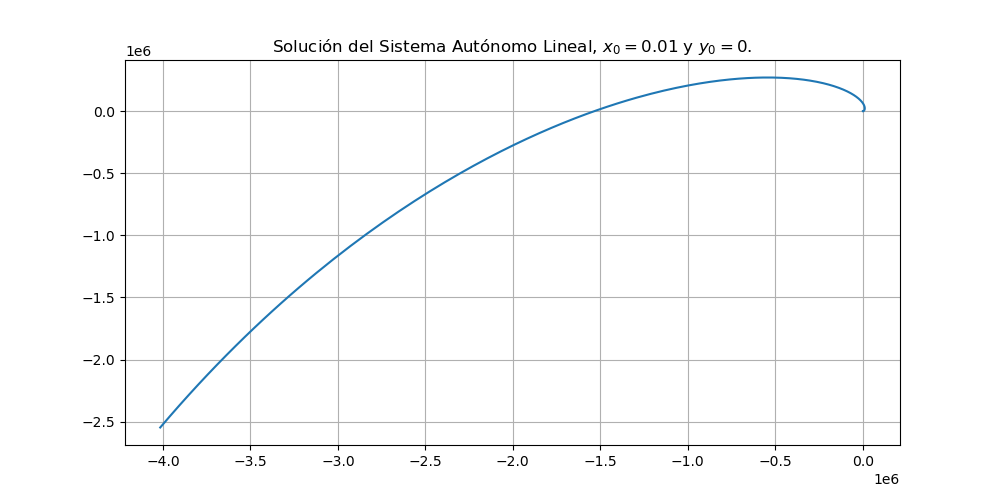

In [3]:
# Asumiendo condiciones iniciales cualesquiera:
t_aut = np.arange(0, 10, 0.01)
aut_solution = RK4_Simple(AutSystem, np.array([0.01, 0.]), t_aut)
figAUT = plt.figure(figsize = (10, 5))
axAUT = figAUT.add_subplot(111)
axAUT.plot(aut_solution[0], aut_solution[1])
axAUT.set_title(r"Solución del Sistema Autónomo Lineal, $x_{0} = 0.01$ y $y_0 = 0.$")
axAUT.grid()

---

**(b).** Encuentre la matriz de estabilidad del sistema autónomo lineal:

$$x' = 2x - y$$

$$y' = x + 2y$$

La matriz de estabilidad de éste problema se puede encontrar como:

$$\mathbf{M} = \begin{pmatrix}
\dfrac{\partial \dot{x}(x, y)}{\partial x} & \dfrac{\partial \dot{x}(x, y)}{\partial y} \\
\dfrac{\partial \dot{y}(x, y)}{\partial x} & \dfrac{\partial \dot{y}(x, y)}{\partial y}
\end{pmatrix} = \begin{pmatrix}
2 & -1 \\
1 & 2
\end{pmatrix}$$

---

**(c).** Encuentre numéricamente los valores y vectores propios. 

El cálculo de los valores y vectores propios se hará empleando la librería de Lineal Algebra de numpy.

In [4]:
E = np.array([[2, -1],[1,2]])
values,vectors = np.linalg.eig(E)
print("Los valores propios de la matriz son {} \n y sus repectivos vectores propios:\n {}".format(values,vectors))

Los valores propios de la matriz son [2.+1.j 2.-1.j] 
 y sus repectivos vectores propios:
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


Como se logra apreciar, los valores obtenidos para los valores y vectores propios son entradas con contenido en los números complejos, por lo que las soluciones del sistema autónomo oscilarán en el régimen de la solución.

---

**(d).** Dibuje la trayectoria sobre el espacio de fase. ¿Cuál es el punto crítico?

<IPython.core.display.Javascript object>


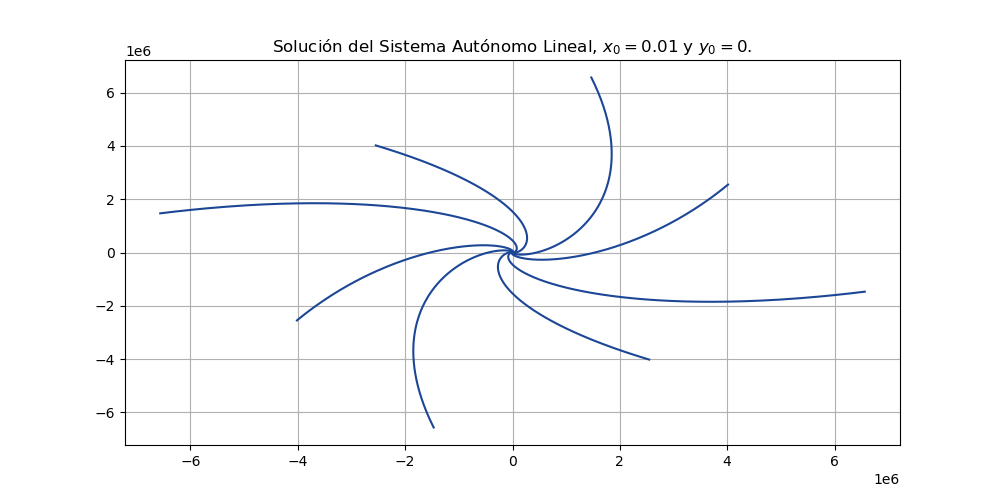

In [5]:
t_aut = np.arange(0, 10, 0.01)
r_initials = [np.array([0.01, 0.]), np.array([0., 0.01]), np.array([-0.01, 0.]), np.array([0., -0.01]), np.array([-0.01, 0.01]), np.array([0.01, -0.01]), np.array([0.01, 0.01]), np.array([-0.01, -0.01])]

figAUT2 = plt.figure(figsize = (10, 5))
axAUT2 = figAUT2.add_subplot(111)
axAUT2.set_title(r"Solución del Sistema Autónomo Lineal, $x_{0} = 0.01$ y $y_0 = 0.$")
axAUT2.grid()

for i in r_initials:
    aut_solution = RK4_Simple(AutSystem, i, t_aut)
    axAUT2.plot(aut_solution[0], aut_solution[1], color = "#1C4696")


Por la definición de punto fijo, sabemos que el escenario en el que ésto sucederá será aquel en que se cumpla:

$$f(x_{0}, y_{0}) = 0 = g(x_{0}, y_{0})$$

Por éste motivo, el punto fijo teórico se conseguiría como:

$$2x - y = 0 \quad \Rightarrow \quad y = 2x$$

$$x + 2y = \quad \Rightarrow \quad y = -\frac{x}{2}$$

Por ende:

$$2x = -\frac{x}{2} \quad \Rightarrow \quad x = 0.  \quad \text{ y } \quad y = 0.$$

Es decir, el punto fijo sería el origen del plano $(0.,\ 0.)$. Nótese en la gráfica superior que todas las expresiones se concentran en ese punto del plano. Dado que los valores propios no son complejos imaginarios puros, las soluciones en cuestión tienen un crecimiento o decrecimiento fuera del régimen de dicho punto, lo que lo hace un punto fijo inestable.

---

**3. Symmetric spinning top:** [Contexto entero en las notas de la clase.]

---

**(a).** Muestre con todo detalle que:

$$I_{0} = \frac{1}{4}mr^{2} + md^{2}.$$


![Diagrama del objeto](https://github.com/jcrojasv1/MetodosII_ThomasAndrade_JuanRojas/blob/main/3.%20Tercer%20Taller/imag/diagram.png?raw=true "Diagrama")


Defínase $\alpha = \frac{\pi}{2} - \theta$. Entonces, la distancia de un $\text{d}m$ al eje de rotación está dado por $r\sin\alpha$. Por otro lado, usando la proyección del disco sobre el plano $xy$, se puede ver que esta es una elipse con forma $$\frac{x^2}{r^2\sin \alpha^2} + \frac{y^2}{r^2} = 1$$ El sistema, sería entonces equivalente a una elipse plana. Como se muestra.

![Elipse equivalente al sistema con respecto al eje de rotación puntedo.](https://github.com/jcrojasv1/MetodosII_ThomasAndrade_JuanRojas/blob/main/3.%20Tercer%20Taller/imag/elipse.png?raw=true "Situación equivalente")

Entonces, se puede hacer la integral con respecto a esta elipse.

\begin{align*}
I &= \int_{-r\sin\alpha}^{r\sin\alpha}\int_{-\frac{1}{\sin\alpha}\sqrt{r^2\sin^2\alpha - x^2}}^{\frac{1}{\sin\alpha}\sqrt{r^2\sin^2\alpha - x^2}} (x^2 + y^2) \text{d} m \\
&= \int_{-r\sin\alpha}^{r\sin\alpha}\int_{-\frac{1}{\sin\alpha}\sqrt{r^2\sin^2\alpha - x^2}}^{\frac{1}{\sin\alpha}\sqrt{r^2\sin^2\alpha - x^2}} (x^2 + y^2) \rho \text{d}y \text{d}x\\ 
&= \frac{1}{r^3\sin^3\alpha}\int_{-r\sin\alpha}^{r\sin\alpha}\int_{-r\sqrt{r^2\sin^2\alpha - x^2}}^{r\sqrt{r^2\sin^2\alpha - x^2}} (r^2\sin^2\alpha x^2 + y^2) \rho \text{d}y \text{d}x
\end{align*}

Por razones prácticas, sea $a = r\sin \alpha$
\begin{align*}
I &= \frac{1}{a^3}\int_{-a}^{a}\int_{-r\sqrt{a^2 - x^2}}^{r\sqrt{a^2 - x^2}} (a^2 x^2 + y^2) \rho \text{d}y \text{d}x \\
 &= \frac{2\rho}{a^3} \int_{-a}^{a} \underbrace{a^2x^2r\sqrt{a^2-x^2}}_{I_1} + \underbrace{\frac{1}{3}r^3(a^2-x^2)^{3/2}}_{I_2} \text{d} x
 \end{align*}
 
Para la primera integral, por tabla, se tiene que 
 
 $$I_1 = \frac{\pi}{8}ra^6$$
 
 Para la segunda integral, también por tabla, se tiene que 
 
 $$I_2 = \frac{\pi}{8}r^3a^4$$
 Entonces
 
 \begin{align*}
 I &= \frac{2\rho}{a^3}\left( \frac{\pi}{8}ra^6 + \frac{\pi}{8}r^3a^4\right) \\
 &= \frac{\pi\rho}{4}\left( ra^3 + r^3a\right)\\
 &= \frac{\pi\rho}{4}(r^4\sin^3\alpha + r^4\sin\alpha)\\
 &= \frac{\pi\rho}{4}r^2\sin\alpha(\sin^2{\alpha}+1)r^2 \\
 \end{align*}
 
 El área de la elipse es $A = \pi r^2\sin\alpha$, entonces
 $$I = \frac{1}{4}mr^2(1+\sin^2\alpha)$$
 
 Este es el momento de inercia con respecto al eje punteado, por lo que, para cambiar el momento de inercia con respecto al eje de giro $\vec{\Omega}$. Por tanto, el momento de incercia es $$I_0 = \frac{1}{4}mr^2(1+\sin^2\alpha) + md^2$$

---

**(b).** Calcule el momento de incercia del disco:

$$I_{z} = \frac{1}{2}mr^{2}$$

El momento de inercia con respecto a $z$, en el caso del diagrama $z'$, se puede calcular el momento de inercia de esta forma: \\

Tomando que $m = \rho A = \rho (\pi r^2) \implies \text{d} m = 2 \pi r \rho \text{d} r$ . Se tiene que 
\begin{align*}
I_z &= \int_{0}^{r} r'^2 \text{d} m \\
&= \int_{0}^{r} 2 \pi r' \rho r'^2 \text{d}r \\
&= 2\pi \rho\int_{0}^{r} r'^3 \text{d}r \\
&= 2 \pi \rho \frac{r^4}{4} =  \rho \pi r^2 \frac{r^2}{2} = \frac{1}{2}mr^2.
\end{align*}

---

**(c).** Usando las ecuaciones de Euler-Lagrange muestre que las ecuaciones de movimiento están dadas por:

$$\frac{\partial \mathcal{L}}{\partial \dot{\phi}} = \dot{\phi} \cdot \left(I_{0}\sin^{2}\theta + I_{z}\cos^{2}\theta\right) + I_{z}\dot{\psi}\cos\theta = p_{\phi}$$

$$\frac{\partial \mathcal{L}}{\partial \dot{\psi}} = I_{z}\left(\dot{\psi} + \dot{\phi}\cos\theta\right) = p_{\psi}$$

$$I_{0}\ddot{\theta} = \dot{\phi}^{2}\sin\theta\cos\theta(I_{0} - I_{z}) - \dot{\phi}\dot{\psi}I_{z}\sin\theta + mgd\sin\theta.$$

donde $p_{\phi}$ y $p_{\psi}$ son los momentos canónicos conjugados de las variables $\phi$ y $\psi$ (note que además se conservan).




---

Teniendo en cuenta el lagrangiano del sistema

$$\mathcal{L} = \frac{1}{2}I_0\left(\dot{\phi}^2\sin^2\theta + \dot{\theta}^2\right) + \frac{1}{2}I_z\left(\dot{\phi}\cos\theta + \dot{\psi} \right)^2 - mgd\cos\theta$$
y la ecuación de Euler-Lagrange

$$\frac{\partial\mathcal{L}}{\partial q_i}- \frac{\text{d}}{\text{d}t}\left( \frac{\partial\mathcal{L}}{\partial \dot{q_i}}\right) = 0$$

- Tómese la derivada partial del lagrangiano con respecto de $\dot{\phi}$:
\begin{align*}
\frac{\partial \mathcal{L}}{\partial \dot{\phi}} &= I_0\dot{\phi}\sin^2\theta +  I_z\left(\dot{\phi}\cos\theta + \dot{\psi} \right)\cos\theta \\
&= I_0\dot{\phi}\sin^2\theta +  I_z\dot{\phi}\cos^2\theta + \dot{\psi}\cos\theta
\end{align*}

- Tomando la derivada parcial con respecto de $\dot{\psi}$ y usando la regla de la cadena
\begin{align*}
\frac{\partial \mathcal{L}}{\partial \dot{\psi}} = \frac{1}{2}I_z 2\left(\dot{\phi}\cos\theta + \dot\psi\right) = I_z \left(\dot{\phi}\cos\theta + \dot\psi\right)
\end{align*}

- Tomando el lagrangiano con respecto a $\theta$, entonces, por practicidad, se harán los cálculos de $\partial_\theta \mathcal{L}$, $\partial_{\dot{\theta}}\mathcal{L}$ y $\frac{\text{d}}{\text{d}t}\left(\partial_{\dot{\theta}}\mathcal{L}\right)$:


El primer cálculo es

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \theta} = I_0\dot{\phi}^2\sin\theta\cos\theta - I_z(\dot{\phi}\cos\theta + \dot{\psi})\dot{\phi}\sin\theta + mgd\sin\theta
\end{align*}

el segundo cálculo es

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \dot{\theta}} = I_0\dot{\theta}
\end{align*}

y tomando la derivada temporal de lo anterior

\begin{align*}
    \frac{\text{d}}{\text{d}t}\left(\frac{\partial \mathcal{L}}{\partial \dot{\theta}}\right) = I_0 \ddot{\theta}
\end{align*}

Usando la ecuación de Euler-Lagrange, se tiene, entonces

\begin{gather*}
   \frac{\partial \mathcal{L}}{\partial \theta} = \frac{\text{d}}{\text{d}t}\left(\frac{\partial \mathcal{L}}{\partial \dot{\theta}}\right) \\
   I_0\dot{\phi}^2\sin\theta\cos\theta - I_z(\dot{\phi}\cos\theta + \dot{\psi})\dot{\phi}\sin\theta + mgd\sin\theta = I_0 \ddot{\theta} \\
   I_0\ddot{\theta} = I_0\dot{\phi}^2\sin\theta\cos\theta - I_z\dot{\phi}^2\cos\theta\sin\theta - I_z\dot{\psi}\dot{\phi}\sin\theta + mgd\sin\theta \\
   I_{0}\ddot{\theta} = \dot{\phi}^{2}\sin\theta\cos\theta(I_{0} - I_{z}) - \dot{\phi}\dot{\psi}I_{z}\sin\theta + mgd\sin\theta
\end{gather*}

---

**(e).** Usando los integradores de $\verb|Scipy|$, integre el sistema de ecuaciones diferenciales con el siguiente orden:

$\mathbf{y} = \left[\phi, \psi, \theta, \dot{\theta}\right]$ con la condición inicial: $\mathbf{y_{0}} = \left[0, 0, \pi/4, 0\right]$. El intervalo de integración es $t \in \left[0, 8\right]$ s. Use los siguientes parámetros del sistema: $m = 0.1$ kg, $r = 0.1$ m, $d = 0.3$ m, $g = 9.81$ m$/$s$^{2}$, $\dot{\psi} = 400$ rad$/$s. Adicionalmente, para integrar la ecuación debe encontrar los momentos canónicos: $p_{\phi} = I_{z}\dot{\psi}\cos\theta_{0}$, $p_{\psi} = I_{z}\dot{\psi}$.

In [6]:
m = 0.1 
r = 0.1
d = 0.3
g = 9.81
psi_dot_0 = 400
theta_0 = np.pi/4
t = np.linspace(0,8,1000)

def I_0(theta):
    return (1/4)*m*r**2*(1+np.cos(theta)**2) + m*d**2

I_z = 0.5*m*r**2

p_phi = I_z*psi_dot_0*np.cos(theta_0)


def phi_dot(theta):
    return (p_phi - I_z*psi_dot_0*np.cos(theta))/(I_0(theta)*np.sin(theta)**2+I_z*np.cos(theta)**2)



def System(y,t):
    phi,psi,theta,theta_dot = y
    
    dpsidt = psi_dot_0
    dphidt = phi_dot(theta)
    dtheta = theta_dot
    ddthetaddt = (dphidt**2 *np.sin(theta)*np.cos(theta)*(I_0(theta) - I_z) - dphidt*dpsidt*I_z*np.sin(theta)+m*g*d*np.sin(theta))/I_0(theta)
    
    return [dphidt,dphidt,dtheta,ddthetaddt]

y_01 = (0.,0.,np.pi/4,0)
y_02 = (0.,4,0,1e-3)


y1 = sci.integrate.odeint(System,y_01,t)
y2 = sci.integrate.odeint(System,y_02,t)

phi_1 = y1[:,0]
psi_1 = y1[:,1]
theta_1 = y1[:,2]

phi_2 = y2[:,0]
psi_2 = y2[:,1]
theta_2 = y2[:,2]

x1 = d*np.sin(theta_1)*np.sin(phi_1)
y1= d*np.sin(theta_1)*np.cos(phi_1)
z1 = d*np.cos(theta_1)

x2 = d*np.sin(theta_2)*np.sin(phi_2)
y2= d*np.sin(theta_2)*np.cos(phi_2)
z2 = d*np.cos(theta_2)



---

**(f).** Anime la solución para mostrar el proceso de precesión y nutación en este sistema.


<IPython.core.display.Javascript object>


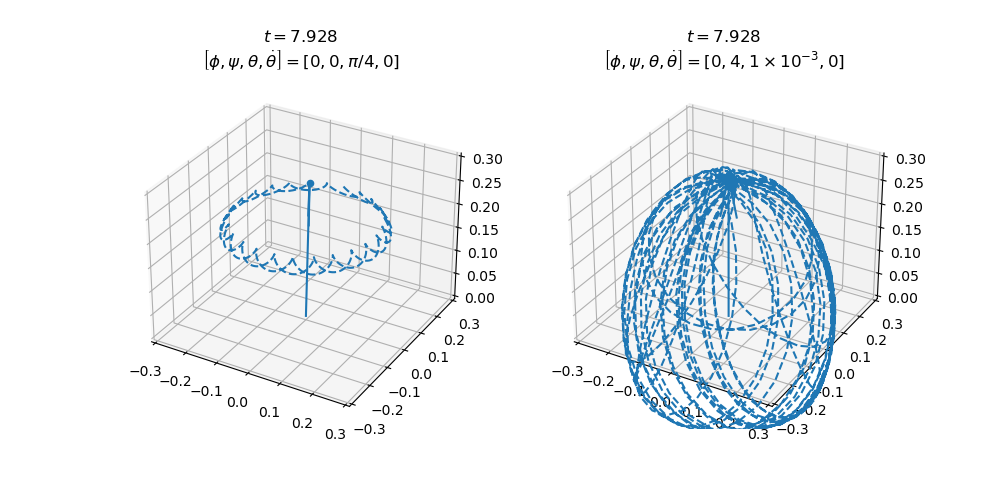

In [7]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121,projection="3d")
ax1 = fig.add_subplot(122,projection="3d")


def init_():
    
    ax.clear()
    ax.set_zlim(0,0.3)
    ax.set_ylim(-0.3,0.3)
    ax.set_xlim(-0.3,0.3)
    ax1.clear()
    ax1.set_zlim(0,0.3)
    ax1.set_ylim(-0.3,0.3)
    ax1.set_xlim(-0.3,0.3)
    
    
def Update_(i):
    
    init_()
    
    ax.quiver(0,0,0,x1[10*i],y1[10*i],z1[10*i])
    ax.plot(x1[:10*i],y1[:10*i],z1[:10*i],"--")
    ax.scatter(x1[10*i],y1[10*i],z1[10*i])
    ax.set_title(r"$t = %s$"%(round(t[10*i],3)) + "\n" +  r"$\left[\phi, \psi, \theta, \dot{\theta}\right] = \left[0, 0, \pi/4, 0\right]$")
    
    ax1.quiver(0,0,0,x2[10*i],y2[10*i],z2[10*i])
    ax1.plot(x2[:10*i],y2[:10*i],z2[:10*i],"--")
    ax1.scatter(x2[10*i],y2[10*i],z2[10*i])
    ax1.set_title(r"$t = %s$"%(round(t[10*i],3)))
    ax1.set_title(r"$t = %s$"%(round(t[10*i],3)) + "\n" +  r"$\left[\phi, \psi, \theta, \dot{\theta}\right] = \left[0, 4, 1\times10^{-3}, 0\right]$")
        

        
    
Animation = anim.FuncAnimation(fig,Update_,frames=len(t[::10]),init_func=init_, repeat = False)


Se hicieron dos gráficas para ver cómo se comporta el sistema bajo otras condiciones iniciales. La primera gráfica es aquella que requiere el enunciado.

---
**(g).** ¿Cuál es la velocidad de precesión del sistema?

La velocidad de precesión va a estar dada por $\dot{\phi}$ ya que esta coordenada es aquella que dirige el movimiento alrededor de $\vec{\Omega}$.

---

**3. Viaje a la Luna:** La NASA requiere dos estudiantes del curso de métodoscomputacionales para realizar una pasantía en el departamento de objetos cercanos a la Tierra. Para elegir a los estudiantes se solicita una simulación sencilla del problema de tres cuerpos de una nave que pueda fotografiar el lado oculto de la Luna. Yo sugerí a mis estudiantes del curso de Métodos Computacionales II de la Universidad de los Andes como posibles candidatos; en quienes puedo depositar mi confianza.

Para presentar sus propuestas sugiero la siguiente estrategia:

**(a).** Vamos a suponer la Tierra inmóvil y la Luna siguiendo una órbita circular cuya frecuencia angular es $\omega = 2.6617 \times 10^{−6}\text{s}^{−1}$. Esto evita integrar la ecuación de la Luna, la cual es en realidad elíptica.

**(b).** La simulación será realizada en el S.I. de unidades que resulta más conveniente en el caso del sistema Tierra-Luna. El paso de integración deben ser segundos de vuelo $(h ∼ s)$, pero se debe graficar cada $1000$ pasos usando animation dado que el viaje a la Luna dura días terrestres.

$$G = 6.67 \times 10^{-11} \ \text{Nm}^{2}\text{kg}^{-2}$$

$$m_{T} = 5.9736 \times 10^{24} \ \text{kg}$$

$$r_{T} = 6.3781 \times 10^{6} \text{m}$$

$$m_{L} = 0.07349 \times 10^{24} \ \text{kg}$$

$$r_{L} = 1.7374 \times 10^{6} \text{m}$$

$$d = 3.844 \times 10^{8} \text{m}$$

---

**(c).** Muestre, usando la imágen en las notas, que la distancia Nave-Luna está dada por:

$$r_{NL}(r, \phi, t) = \sqrt{r(t)^{2} + d_{TL}^{2} - 2r(t) \cdot d_{TL} \cdot \cos(\phi - \omega{t})}$$

---

Para poder comprobar ésta expresión, consideremos las siguientes ecuaciones para las posiciones de la luna y de la nave con respecto a la tierra:

$$r_{LT}(t) = d_{LT} \cdot \cos(\omega t) \hat{i} + d_{LT} \cdot \sin(\omega t) \hat{j}$$

$$r_{NT}(t) = r(t) \cdot \cos(\phi(t)) \hat{i} + r(t) \cdot \sin(\phi(t)) \hat{j}$$

Ahora, la distancia de separación luna-nave se puede encontrar como la norma de la diferencia de ambos vectores, es decir:

$$r_{NL} = \left|r_{LT}(t) - r_{NT}(t)\right| = \sqrt{\left[d_{LT} \cdot \cos(\omega t) - r(t) \cdot \cos(\phi(t))\right]^{2} + \left[d_{LT} \cdot \sin(\omega t) - r(t) \cdot \sin(\phi(t))\right]^{2}}$$

$$ = \sqrt{\left[d_{LT}^{2} \cdot \cos^{2}(\omega t) - 2d_{LT} \cdot r(t) \cdot \cos(\omega t)\cos(\phi(t)) +  r^{2}(t) \cdot \cos^{2}(\phi(t))\right] + \left[d_{LT}^{2} \cdot \sin^{2}(\omega t) -2d_{LT} \cdot r(t) \cdot \sin(\omega t)\sin(\phi(t)) +  r^{2}(t) \cdot \sin^{2}(\phi(t))\right]}$$

$$ = \sqrt{d_{LT}^{2} \cdot \left(\cos^{2}(\omega t) + \sin^{2}(\omega t)\right) + r^{2}(t) \cdot \left(\cos^{2}(\phi(t)) + \sin^{2}(\phi(t))\right) - 2d_{LT} \cdot r(t) \cdot \left(\cos(\omega t)\cos(\phi(t)) + \sin(\omega t)\sin(\phi(t))\right)}$$

$$r_{NL}(r, \phi, t) = \sqrt{r(t)^{2} + d^{2} - 2r(t) \cdot d_{TL} \cdot \cos(\phi - \omega{t})}$$

Obteniendo así el resultado de interés.

---

**(d).** Usando esta distancia muestre que el Hamiltoniano de la nave está dado por:

$$H = p_{r}\dot{r} + p_{\phi}\phi - L = \frac{p_{r}^{2}}{2m} + \frac{p_{\phi}^{2}}{2mr^{2}} - G\frac{mm_{T}}{r} - G\frac{mm_{L}}{r_{L}(r, \phi, t)}$$

donde $L$ (el lagrangiano del sistema) es la energía cinética menos la energía potencial de la nave en coordenadas polares.

---

Para calcular el Hamiltoniano asociado a ésta situación física, primero conviene obtener Lagrangiano del sistema. Para ello, las energías cinética y potencial serían:

$$r_{NT} = r(t) \cdot \cos(\phi(t)) \hat{i} + r(t) \cdot \sin(\phi(t))\hat{j}$$

$$\dot{r}_{NT} = \left[\dot{r}(t) \cdot \cos(\phi(t)) - r(t) \cdot \sin(\phi(t)) \cdot \dot{\phi}(t)\right] \hat{i} + \left[\dot{r}(t) \cdot \sin(\phi(t)) + r(t) \cdot \cos(\phi(t)) \cdot \dot{\phi}(t)\right]\hat{j}$$

$$\left|r_{NT}(t)\right|^{2} = \dot{r}^{2}(t) \cdot \cos^{2}(\phi(t)) - 2\dot{r}(t) \cdot r(t) \cdot \cos(\phi(t)) \cdot \sin(\phi(t)) + r^{2}(t) \cdot \sin^{2}(\phi(t)) \cdot \dot{\phi}^{2}(t) + \dot{r}^{2}(t) \cdot \sin^{2}(\phi(t)) + 2\dot{r}(t) \cdot r(t) \cdot \cos(\phi(t)) \cdot \sin(\phi(t)) + + r^{2}(t) \cdot \cos^{2}(\phi(t)) \cdot \dot{\phi}^{2}(t)$$

$$ = \dot{r}^{2}(t) \cdot \left(\cos^{2}(\phi(t)) + \sin^{2}(\phi(t)\right) + r^{2}(t) \cdot \dot{\phi}^{2}(t) \cdot \left(\cos^{2}(\phi(t)) + \sin^{2}(\phi(t)\right)$$

$$\left|r_{NT}(t)\right|^{2} = \dot{r}^{2}(t) + r^{2}(t) \cdot \dot{\phi}^{2}(t)$$

Para la energía cinética tenemos:

$$T = \frac{1}{2}m\cdot \left|r_{NT}(t)\right|^{2} = \frac{1}{2} m \cdot \left(\dot{r}^{2}(t) + r^{2}(t) \cdot \dot{\phi}^{2}(t)\right)$$

Por parte de la energía potencial, aquella que se considera es la potencial gravitacional que siente la nave por la tierra y la luna, por ende:

$$U = -G\frac{mm_{T}}{r(t)} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)}$$

Por lo anterior, el Langrangiano sería:

$$L = T - U = \frac{1}{2} m \cdot \left(\dot{r}^{2}(t) + r^{2}(t) \cdot \dot{\phi}^{2}(t)\right) + G\frac{mm_{T}}{r(t)} + G\frac{mm_{L}}{r_{NL}(r, \phi, t)} $$

Ahora, para calcular el Hamiltoniano necesitamos los momentos generalizados. Para ésto, se deriva con respecto a las variables derivadas:

$$\frac{\partial L}{\partial \dot{r}} = p_{r} = m\dot{r}(t) \quad \text{ y } \quad \frac{\partial L}{\partial \dot{\phi}} = p_{\phi} = mr^{2}(t)\dot{\phi}(t)$$

Reescribiendo el Lagrangiano y los productos de la coordenadas y momentos generalizados en éstos términos:

$$L = \frac{p_{r}^{2}}{2m} + \frac{p_{\phi}^{2}}{2mr^{2}(t)} + G\frac{mm_{T}}{r(t)} + G\frac{mm_{L}}{r_{NL}(r, \phi, t)} \quad \text{ , } \quad p_{r}\dot{r}(t) = p_{r}\frac{m\dot{r}(t)}{m} = \frac{p^{2}_{r}}{m} \quad \text{ y } \quad p_{\phi}\dot{\phi}(t) = p_{r}\frac{mr^{2}(t)\dot{\phi}(t)}{mr^{2}(t)} = \frac{p^{2}_{\phi}}{mr^{2}(t)}$$

El Hamiltoniano resulta entonces en:

$$H = p_{r}\dot{r} + p_{\phi}\phi - L = \frac{p_{r}^{2}}{m} + \frac{p_{\phi}^{2}}{mr^{2}} - \frac{p_{r}^{2}}{2m} - \frac{p_{\phi}^{2}}{2mr^{2}} - G\frac{mm_{T}}{r} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)}$$
$$H = \frac{p_{r}^{2}}{2m} + \frac{p_{\phi}^{2}}{2mr^{2}} - G\frac{mm_{T}}{r} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)}$$

Tal y como describe el enunciado.

---

**(e).** Muestre que las ecuaciones de Hamilton, que son las ecuaciones de movimiento están
dadas por:

$$\dot{r} = \frac{\partial H}{\partial p_{r}} = \frac{p_{r}}{m}$$

$$\dot{\phi} = \frac{\partial H}{\partial p_{\phi}} = \frac{p_{\phi}}{mr^{2}}$$

$$\dot{p}_{r} = \frac{\partial H}{\partial r} = \frac{p_{\phi}^{2}}{mr^{3}} - G\frac{mm_{L}}{r^{2}} -G\frac{mm_{L}}{r_{NL}(r, \phi, t)^{3}} \cdot \left[r - d\cos(\phi - \omega t)\right]$$

$$\dot{p}_{\phi} = \frac{\partial H}{\partial \phi} = -G\frac{mm_{L}}{r_{NL}(r, \phi, t)^{3}} \cdot rd \sin(\phi - \omega t)$$

Note que las dos primeras ecuaciones se refiere al momento lineal y angular de la nave y las segundas a la fuerza. Adicionalmente, este sistema de ecuaciones diferenciales no tiene solución analítica al ser no lineales. Este tipo de sistemas son de gran estudio numérico para establecer órbitas más reales.

---

El cálculo de las ecuaciones de movimiento se muestra a continuación:

$$\dot{r} = \frac{\partial H}{\partial p_{r}} = \frac{\partial }{\partial p_{r}} \left(\frac{p_{r}^{2}}{2m} + \frac{p_{\phi}^{2}}{2mr^{2}(t)} - G\frac{mm_{T}}{r(t)} - G\frac{mm_{L}}{r_{L}(r, \phi, t)}\right) = \dots$$

$$ \dots = \frac{\partial }{\partial p_{r}} \left(\frac{p_{r}^{2}}{2m}\right) + \frac{\partial }{\partial p_{r}} \left(\frac{p_{\phi}^{2}}{2mr^{2}(t)}\right) - \frac{\partial }{\partial p_{r}} \left(G\frac{mm_{T}}{r(t)}\right) - \frac{\partial }{\partial p_{r}} \left(G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = \frac{p_{r}}{m} + 0 + 0 +0 \quad \Rightarrow \quad \dot{r} = \frac{p_{r}}{m}$$

$$\dot{\phi} = \frac{\partial H}{\partial p_{\phi}} = \frac{\partial }{\partial p_{\phi}} \left(\frac{p_{r}^{2}}{2m} + \frac{p_{\phi}^{2}}{2mr^{2}(t)} - G\frac{mm_{T}}{r(t)} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = \dots$$

$$ \dots = \frac{\partial }{\partial p_{\phi}} \left(\frac{p_{r}^{2}}{2m}\right) + \frac{\partial }{\partial p_{\phi}} \left(\frac{p_{\phi}^{2}}{2mr^{2}(t)}\right) - \frac{\partial }{\partial p_{\phi}} \left(G\frac{mm_{T}}{r(t)}\right) - \frac{\partial }{\partial p_{\phi}} \left(G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = 0 + \frac{p_{\phi}}{mr^{2}(t)} + 0 +0 \quad \Rightarrow \quad \dot{\phi} = \frac{p_{\phi}}{mr^{2}(t)}$$

Para el caso de $p_{r}$ y $p_{\theta}$ se derivará la expresión que involucra $r_{NL}$:

$$\frac{\partial}{\partial r}\left(\frac{1}{r_{NL}(r, \phi, t)}\right) = \frac{\partial}{\partial r}\left(\frac{1}{\sqrt{r(t)^{2} + d^{2} - 2r(t) \cdot d_{TL} \cdot \cos(\phi - \omega{t})}}\right) = \dots$$

$$\dots = -\frac{1}{2\sqrt{r(t)^{2} + d^{2} - 2r(t) \cdot d_{TL} \cdot \cos(\phi - \omega{t})}^{3}} \cdot \left(2r(t) - 2d_{TL} \cdot \cos(\phi - \omega{t})\right) = \frac{1}{r_{NL}^{3}(r, \phi, t)} \cdot \left[r(t) - d_{TL} \cdot \cos(\phi - \omega{t})\right]$$

$$\frac{\partial}{\partial \phi}\left(\frac{1}{r_{NL}(r, \phi, t)}\right) = \frac{\partial}{\partial \phi}\left(\frac{1}{\sqrt{r(t)^{2} + d^{2} - 2r(t) \cdot d_{TL} \cdot \cos(\phi - \omega{t})}}\right) = \dots$$

$$\dots = \frac{1}{2\sqrt{r(t)^{2} + d^{2} - 2r(t) \cdot d_{TL} \cdot \cos(\phi - \omega{t})}^{3}} \cdot \left(2r(t) \cdot d_{TL} \cdot \sin(\phi - \omega{t})\right) = \frac{1}{r_{NL}^{3}(r, \phi, t)} \cdot \left[r(t) \cdot d_{TL} \cdot \sin(\phi - \omega{t})\right]$$

Ahora sí, el cálculo de las ecuaciones del momento es:

$$\dot{p}_{r} = -\frac{\partial H}{\partial r} = - \frac{\partial }{\partial r} \left(\frac{p_{r}^{2}}{2m} + \frac{p_{\phi}^{2}}{2mr^{2}(t)} - G\frac{mm_{T}}{r(t)} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = \dots$$

$$ \dots = -\frac{\partial }{\partial r} \left(\frac{p_{r}^{2}}{2m}\right) - \frac{\partial }{\partial r} \left(\frac{p_{\phi}^{2}}{2mr^{2}(t)}\right) + \frac{\partial }{\partial r} \left(G\frac{mm_{T}}{r(t)}\right) + \frac{\partial }{\partial r} \left(G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = 0 + \frac{p_{\phi}^{2}}{mr^{3}(t)} - G\frac{mm_{T}}{r^{2}(t)} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)} \cdot \left[r(t) - d_{TL} \cdot \cos(\phi - \omega{t})\right]$$

$$\Rightarrow \quad \dot{p_{r}} = \frac{p_{\phi}^{2}}{^{3}(t)} - G\frac{mm_{T}}{r^{2}(t)} - G\frac{mm_{L}}{r^{3}_{NL}(r, \phi, t)} \cdot \left[r(t) - d_{TL} \cdot \cos(\phi - \omega{t})\right]$$

$$\dot{p}_{\phi} = -\frac{\partial H}{\partial \phi} = - \frac{\partial }{\partial r} \left(\frac{p_{r}^{2}}{m} + \frac{p_{\phi}^{2}}{2mr^{2}(t)} - G\frac{mm_{T}}{r(t)} - G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = \dots$$

$$ \dots = -\frac{\partial }{\partial \phi} \left(\frac{p_{r}^{2}}{2m}\right) - \frac{\partial }{\partial \phi} \left(\frac{p_{\phi}^{2}}{2mr^{2}(t)}\right) + \frac{\partial }{\partial \phi} \left(G\frac{mm_{T}}{r(t)}\right) + \frac{\partial }{\partial \phi} \left(G\frac{mm_{L}}{r_{NL}(r, \phi, t)}\right) = 0 + 0 - 0 - G\frac{mm_{L}}{r_{NL}^{3}(r, \phi, t)} \cdot \left[r(t) \cdot d_{TL} \cdot \sin(\phi - \omega{t})\right]$$

$$\Rightarrow \quad \dot{p}_{\phi} = - G\frac{mm_{L}}{r_{NL}^{3}(r, \phi, t)} \cdot \left[r(t) \cdot d_{TL} \cdot \sin(\phi - \omega{t})\right]$$

Obteniendo así las mismas expresiones del enunciado.

---

**(f)**. Para reducir el error de redondeo se pueden definir nuevas variables normalizadas a la distancia lunar: $\tilde{r} = r/d$, $\phi$, $\tilde{p}_{r} = p_{r}/md$ y $\tilde{p}_\phi = p_{\phi}/md^{2}$. Muestre que el sistema se puede escribir como sigue:

$$\dot{\tilde{r}} = \dot{\tilde{p}}_{r}$$

$$\dot{\phi} = \frac{\dot{\tilde{p}}_{\phi}}{\tilde{r}^{2}}$$

$$\dot{\tilde{p}}_{r} = \frac{\dot{\tilde{p}}_{\phi}^{2}}{r^{3}} - \Delta \left[\frac{1}{\tilde{r}^{2}} + \frac{\mu}{\tilde{r}'^{3}}\left[r - \cos(\phi - \omega t)\right]\right]$$

$$\dot{\tilde{p}}_{\phi} = -\frac{\Delta\mu\tilde{r}}{\tilde{r}'^{3}} \cdot \sin(\phi - \omega t)$$

donde $\Delta = Gm_{T}/d^{3}$, $\mu = m_{L}/m_{T}$ y $\tilde{r}' = \sqrt{1 + \tilde{r}^{2} - 2\tilde{r}\cos(\phi - \omega t)}$.

---

Haciendo los respectivos cambios de variable a cada variable normalizada se obtendría:

---

$$\dot{r} = \frac{p_{r}}{m} \quad \Rightarrow \quad \dot{\tilde{r}} = \frac{\dot{r}}{d_{TL}} = \frac{p_{r}}{m \cdot d_{TL}} = \tilde{p}_{r}\$$

$$\dot{\phi} = \frac{p_{\phi}}{mr^{2}(t)} \quad \Rightarrow \quad \dot{\phi} = \frac{p_{r}/d^{2}_{TL}}{m \cdot r^{2}(t)/d^{2}_{TL}} = \frac{\tilde{p}_{\phi}}{\tilde{r}^{2}}$$

---

$$\dot{p}_{r} = \frac{p_{\phi}^{2}}{2mr^{3}(t)} - G\frac{mm_{T}}{r^{2}(t)} - G\frac{mm_{L}}{r^{3}_{NL}(r, \phi, t)} \cdot \left[r(t) - d_{TL} \cdot \cos(\phi - \omega{t})\right]$$

$$\dot{\tilde{p}}_{r} = \frac{\dot{p}_{r}}{md_{TL}} = \frac{1}{md_{TL}} \cdot \left[ \frac{p_{\phi}^{2}/m^{2}d^{4}_{TL}}{r^{3}(t)/m^{2}d^{4}_{TL}} - G\frac{mm_{T}/d^{2}_{TL}}{r^{2}(t)/d^{2}_{TL}} - G\frac{mm_{L}/d^{3}_{TL}}{r^{3}_{NL}(r, \phi, t)/d^{3}_{TL}} \cdot d_{TL} \cdot \left[\frac{r(t)}{d_{TL}} - \cos(\phi - \omega{t})\right]\right] = \dots$$

$$\dots = \frac{1}{md_{TL}} \cdot \left[ \frac{\tilde{p}_{\phi}^{2} \cdot md_{TL}}{\tilde{r}^{3}} - G\frac{m_{T} \cdot m}{d^{2}_{TL}\tilde{r}^{2}} - G\frac{mm_{L}}{d_{TL}^{2} \cdot r'^{3}} \cdot \left[\tilde{r} - \cos(\phi - \omega{t})\right]\right] = \frac{\tilde{p}_{\phi}^{2}}{\tilde{r}^{3}} - G\frac{m_{T}}{d_{TL}^{3}} \cdot \left[\frac{1}{\tilde{r}^{2}} + \frac{m_{L}}{m_{T} \cdot r'^{3}} \cdot \left[\tilde{r} - \cos(\phi - \omega{t})\right]\right]$$

$$\Rightarrow \quad \dot{\tilde{p}}_{r} = \frac{\dot{\tilde{p}}_{\phi}^{2}}{r^{3}} - \Delta \left[\frac{1}{\tilde{r}^{2}} + \frac{\mu}{\tilde{r}'^{3}}\left[r - d\cos(\phi - \omega t)\right]\right]$$

---

$$\dot{p}_{\phi} = - G\frac{mm_{L}}{r_{NL}^{3}(r, \phi, t)} \cdot \left[r(t) \cdot d_{TL} \cdot \sin(\phi - \omega{t})\right]$$

$$\dot{\tilde{p}}_{\phi} = \frac{\dot{p}_{\phi}}{md_{TL}^{2}} = -\frac{1}{md_{TL}^{2}} \cdot G\frac{mm_{L}}{r_{NL}^{3}(r, \phi, t)} \cdot d_{TL} \cdot \left[r(t) \cdot \sin(\phi - \omega{t})\right] = - G\frac{m_{L}/d^{3}_{TL}}{r_{NL}^{3}(r, \phi, t)/d^{3}_{TL}} \cdot \left[\tilde{r} \cdot \sin(\phi - \omega{t})\right] = \dots$$

$$\dots = - G\frac{m_{L}}{d^{3}_{TL}r'^{3}} \cdot \left[\tilde{r} \cdot \sin(\phi - \omega{t})\right] = - G\frac{m_{T}}{d^{3}_{TL}} \cdot \frac{m_{L}}{m_{T}} \cdot \frac{1}{r'} \cdot \left[\tilde{r} \cdot \sin(\phi - \omega{t})\right] $$

$$\Rightarrow \quad \dot{\tilde{p}}_{\phi} = -\frac{\Delta\mu\tilde{r}}{\tilde{r}'^{3}} \cdot \sin(\phi - \omega t)$$

Mostrando así la veracidad de las ecuaciones del enunciado.

---

**(g).** Resolver el sistema de ecuaciones usando el algoritmo Runge-Kutta 4 con las siguientes condiciones iniciales: El radio inicial es el radio terrestre $r = r_{T}$ , $\phi$ es la latitud sobre el planeta, la velocidad inicial está dada por: $v = [v\cos(\theta), v\sin(\theta)]$ no hay un método
general para asignar $v$, $\theta$, $\phi$. La magnitud de la velocidad debe ser cercana la velocidad de escape de la Tierra para que la nave se pueda poner rumbo a la Luna. Ustedes deben ajustar los ángulos para lograr fotografiar el lado oculto de la Luna; lanzando su misión cuando la Luna se encuentre en el Perigeo orbital $(y = 0)$ en el eje $x$. Finalmente, para asignar los momentos canónicos iniciales muestre lo siguiente:

$$\tilde{p}_{r}^{0} = \frac{p_{r}}{md_{TL}} = \frac{1}{d_{TL}} \frac{dr}{dt} = \frac{1}{d_{TL}} \left(\frac{d\sqrt{x^{2} + y^{2}}}{dt}\right) = \frac{x\dot{x} + y\dot{y}}{rd_{TL}} = \tilde{v}_{0} \cos(\theta - \phi)$$

$$\tilde{p}_{\phi}^{0} = \frac{p_{\phi}}{md_{TL}^{2}} = \tilde{r}^{2} \frac{d}{dt} \arctan\left(\frac{y}{x}\right) = \frac{\tilde{r}^{2}}{1 + y^{2}/x^{2}} \frac{d}{dt}\left(\frac{y}{x}\right) = \frac{\tilde{r}^{2}}{r^{2}} (\dot{y}x - y\dot{x}) = \tilde{r_{0}}\tilde{v_{0}}\sin\left(\theta - \phi \right) $$

Note que estas expresiones son simplemente el momento lineal y angular iniciales por unidad de masa de la nave espacial.

---

Partamos del hecho de que, considerando la velocidad en un tiempo inicial $t_{0}$ se puede escribir como $\vec{v}_{0} = (\dot{x}_{0}, \dot{y}_{0}) =(v_{0}\cos(\theta), v_{0}\sin(\theta))$. Como el momento se define como el cambio a través del tiempo del producto masa-velocidad, el momento canónico normalizado inicial se puede encontrar como:

$$\tilde{p}_{r}^{0} = \left.\frac{p_{r}}{md_{TL}} \right\vert_{t = t_{0}} = \left.\frac{m\left|v\right|}{md_{TL}}\right\vert_{t = t_{0}} = \left.\frac{1}{d_{TL}} \cdot \frac{d\left|r\right|}{dt}\right\vert_{t = t_{0}} = \left.\frac{1}{d_{TL}} \cdot \frac{d\sqrt{x^{2} + y^{2}}}{dt}\right\vert_{t = t_{0}} = \frac{1}{d_{TL}} \cdot \frac{x \cdot \dot{x}_{0} + y \cdot \dot{y}_{0}}{\sqrt{x^{2} + y^{2}}} = \dots$$

$$\dots = \frac{1}{d_{TL}} \cdot \frac{\left|r\right|\cos(\phi) \cdot v_{0}\cos(\theta) + \left|r\right|\sin(\phi) \cdot v_{0}\sin(\theta)}{\left|r\right|} = \frac{v_{0}}{d_{TL}} \cdot \left(\cos(\phi)\cos(\theta) + \sin(\phi)\sin(\theta)\right) = \tilde{v}_{0}\cdot\cos(\phi - \theta)$$

Por último, en el caso del momento angular canónico normalizado inicial, sabemos que éste se define como masa, por el cuadrado del radio, por velocidad angular. Partiendo de coordenadas cartesianas, el ángulo es la tangente inversa de $y/x$, por lo que la redacción del punto sería algo como:

$$\tilde{p}_{\phi}^{0} = \frac{p_{\phi}}{md_{TL}^{2}} = \frac{mr^{2}\dot{\theta}}{md_{TL}^{2}} = \tilde{r}^{2} \cdot \frac{d}{dt}\arctan\left(\frac{x}{y}\right) = \frac{\tilde{r}^{2}}{1 + \frac{y^{2}}{x^{2}}} \cdot \frac{d}{dt}\left(\frac{x}{y}\right) = \frac{\tilde{r}^{2} \cdot x^{2}}{x^{2} + y^{2}} \cdot \frac{d}{dt}\left(\frac{y}{x}\right) = \frac{\tilde{r}^{2} \cdot x^{2}}{x^{2} + y^{2}} \cdot \frac{\dot{y}\cdot x - y \cdot \dot{x}}{x^{2}} = \dots$$

$$\dots = \frac{\tilde{r}^{2}}{\left|r\right|^{2}} \cdot \frac{\dot{y}\cdot x - y \cdot \dot{x}}{1} = \frac{\tilde{r}^{2} \cdot \left(v_{0}\sin(\theta) \cdot \left|r\right| \cos(\phi) - v_{0}\cos(\theta) \cdot \left|r\right|\sin(\phi)\right)}{\left|r\right|^{2}} = \frac{\tilde{r}^{2} \cdot \left|r\right| \cdot v_{0} \left(\sin(\theta) \cos(\phi) - \cos(\theta)\sin(\phi)\right)}{\left|r\right|^{2}} = \dots$$

$$\dots = \frac{\tilde{r}^{2} \cdot v_{0} \left(\sin(\theta) \cos(\phi) - \cos(\theta)\sin(\phi)\right)}{\left|r\right|} = \frac{\tilde{r}^{2} \cdot v_{0}}{\left|r\right|}\sin(\theta - \phi) = \frac{\tilde{r} \cdot \left|r\right| \cdot v_{0}}{\left|r\right| \cdot d_{TL}}\sin(\theta - \phi) = \tilde{r_{0}}\tilde{v_{0}}\sin\left(\theta - \phi \right)$$

Obteniendo así las expresiones mostradas.

In [23]:
# Definimos los valores de las variables del problema:
G = 6.67e-11 # Nm^{2}/kg^{2}
mT = 5.9736e24 # kg
rT = 6.3781e6 # m
mL = 0.07349e24 # kg
rL = 1.7374e6 # m
d = 3.844e8 # m
omega = 2.6617e-6 # s^{-1}

In [24]:
# Insertamos la información de las condiciones iniciales:
r0 = rT/d
v0 = 11100./d # m/s
theta0 = np.pi/3 - 12*np.pi/180 # rad
phi0 = np.pi/4 # rad
pr0 = v0 * np.cos(theta0 - phi0) # m/s
pphi0 = r0 * v0 * np.sin(theta0 - phi0) #1/s

In [25]:
r_initial = np.array([r0, phi0, pr0, pphi0])
r_initial

array([1.65923517e-02, 7.85398163e-01, 2.88365969e-05, 2.50753907e-08])

In [26]:
def EqSystem(initial, t):
    """
    Se muestra el sistema de ecuaciones denotado por las variables generalizadas. Los cálculos
    son completamente análogos a los mostrados en la teoría.
    """
    r, phi, pr, pphi = initial
    
    delta = (G*mT)/(d**3)
    mu = mL/mT
    prime = np.sqrt(1 + r**2 - 2*r*np.cos(phi - omega*t))
    
    drdt = pr
    dphidt = pphi/(r**2)
    dprdt = (pphi**2)/(r**3) - delta*(1/(r**2) + ((mu)/(prime**3)) * (r - np.cos(phi - omega*t)))
    dpphidt = - ((delta*mu*r)/(prime**3)) * np.sin(phi - omega*t)
    
    return np.array([drdt, dphidt, dprdt, dpphidt])

In [37]:
# Para empezar, véase la solución propuesta para el sistema por parte de scipy.
t_ode = np.arange(0, 1180000, 1) # Medio periodo de rotación de la luna para odeint.
sol_odeint = integrate.odeint(EqSystem, r_initial, t_ode)
odeint_x = sol_odeint[:,0]*np.cos(sol_odeint[:,1])*d
odeint_y = sol_odeint[:,0]*np.sin(sol_odeint[:,1])*d
odemoon_x = d*np.cos(omega*t_ode)
odemoon_y = d*np.sin(omega*t_ode)

<IPython.core.display.Javascript object>


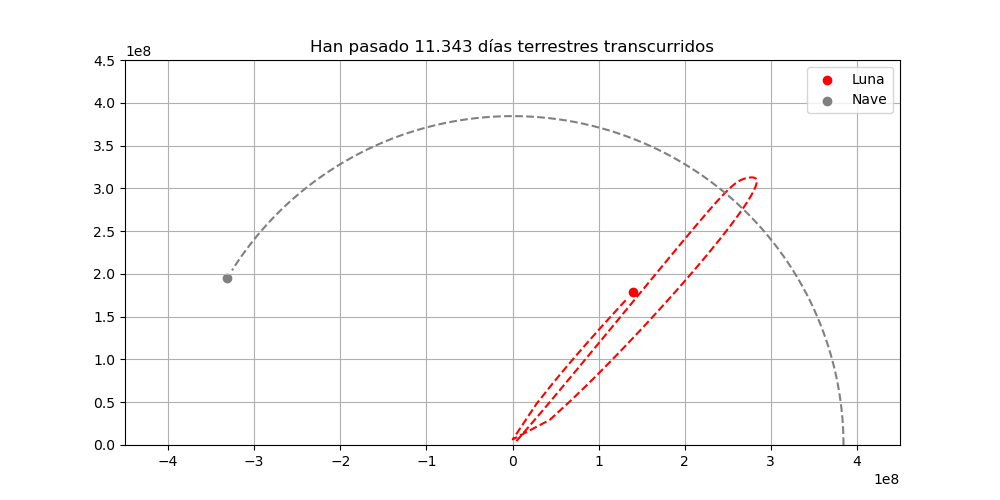

In [38]:
scale = 10000
figODE = plt.figure(figsize = (10, 5))
t_ode = t_ode[::scale]* 1/(86400)
axODE = figODE.add_subplot(111)

def init_ODE():
    axODE.clear()
    axODE.set_xlim(-0.45e9, 0.45e9)
    axODE.set_ylim(0, 0.45e9)

def Update_ODE(i):
    init_ODE()
    axODE.set_title(r'Han pasado %.3f días terrestres transcurridos' %(t_ode[i]))
    axODE.plot(odeint_x[::scale][:i], odeint_y[::scale][:i], color = "red", linestyle="dashed")
    axODE.scatter(odeint_x[::scale][i], odeint_y[::scale][i], color = "red", label = "Luna")
    axODE.plot(odemoon_x[::scale][:i], odemoon_y[::scale][:i], color = "grey", linestyle="dashed")
    axODE.scatter(odemoon_x[::scale][i], odemoon_y[::scale][i], color = "grey", label = "Nave")
    axODE.legend()
    axODE.grid()

AnimationODE = anim.FuncAnimation(figODE,Update_ODE,frames=len(t_ode),init_func=init_ODE, repeat = True)

In [18]:
# Ahora, la implementación de Runge-Kutta 4:
def Vectorial_RK4(f, initial, t):
    """
    Acá se hace una implementación de Runge-Kutta vectorizado. Se usa zeros y no zeros_like
    por un error (creo que eso es) del código que impide modificar las entradas del array.
    """
    r0, phi0, pr0, pphi0 = initial
    step = t[1] - t[0]
    
    r = np.zeros(len(t))
    phi = np.zeros(len(t))
    pr = np.zeros(len(t))
    pphi = np.zeros(len(t))
    
    r[0] = r0
    phi[0] = phi0
    pr[0] = pr0
    pphi[0] = pphi0
    
    for i in tqdm(range(1, len(t)), desc = "Once again, let me cook", unit = "Steps"):
        R1 = np.array([r[i - 1], phi[i - 1], pr[i - 1], pphi[i - 1]])
        K1 = f(R1, t[i - 1])
        
        R2 = np.array([r[i - 1] + 0.5*step*K1[0], phi[i - 1] + 0.5*step*K1[1], pr[i - 1] + 0.5*step*K1[2], pphi[i - 1] + 0.5*step*K1[3]])
        K2 = f(R2, 0.5*step + t[i - 1])
        
        R3 = np.array([r[i - 1] + 0.5*step*K2[0], phi[i - 1] + 0.5*step*K2[1], pr[i - 1] + 0.5*step*K2[2], pphi[i - 1] + 0.5*step*K2[3]])
        K3 = f(R3, 0.5*step + t[i - 1])
        
        R4 = np.array([r[i - 1] + step*K3[0], phi[i - 1] + step*K3[1], pr[i - 1] + step*K3[2], pphi[i - 1] + step*K3[3]])
        K4 = f(R4, step + t[i - 1])
        
        r[i] = r[i - 1] + (step/6) * (K1[0] + 2*K2[0] + 2*K3[0] + K4[0])
        phi[i] = phi[i - 1] + (step/6) * (K1[1] + 2*K2[1] + 2*K3[1] + K4[1])
        pr[i] = pr[i - 1] + (step/6) * (K1[2] + 2*K2[2] + 2*K3[2] + K4[2])
        pphi[i] = pphi[i - 1] + (step/6) * (K1[3] + 2*K2[3] + 2*K3[3] + K4[3])

    return r, phi, pr, pphi

In [19]:
t_RK4 = np.arange(0, 1180000, 2) # Medio periodo de rotación de la luna para RK-4.
RK4_sol = Vectorial_RK4(EqSystem, r_initial, t_RK4)

Once again, let me cook: 100%|███████████████████████████████████████████| 589999/589999 [00:44<00:00, 13162.14Steps/s]


In [21]:
RK4_x = RK4_sol[0]*np.cos(RK4_sol[1])*d
RK4_y = RK4_sol[0]*np.sin(RK4_sol[1])*d
RK4moon_x = d*np.cos(omega*t_RK4)
RK4moon_y = d*np.sin(omega*t_RK4)

<IPython.core.display.Javascript object>


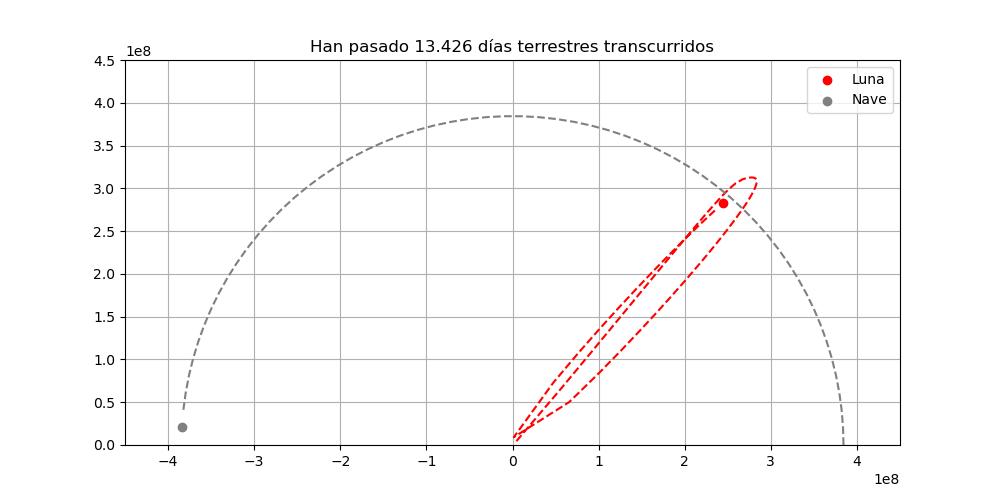

In [22]:
scale = 10000
figRK4 = plt.figure(figsize = (10, 5))
t_RK4 = t_RK4[::scale]* 1/(86400)
axRK4 = figRK4.add_subplot(111)

def init_RK4():
    axRK4.clear()
    axRK4.set_xlim(-0.45e9, 0.45e9)
    axRK4.set_ylim(0, 0.45e9)

def Update_RK4(i):
    init_RK4()
    axRK4.set_title(r'Han pasado %.3f días terrestres transcurridos' %(t_RK4[i]))
    axRK4.plot(RK4_x[::scale][:i], RK4_y[::scale][:i], color = "red", linestyle="dashed")
    axRK4.scatter(RK4_x[::scale][i], RK4_y[::scale][i], color = "red", label = "Luna")
    axRK4.plot(RK4moon_x[::scale][:i], RK4moon_y[::scale][:i], color = "grey", linestyle="dashed")
    axRK4.scatter(RK4moon_x[::scale][i], RK4moon_y[::scale][i], color = "grey", label = "Nave")
    axRK4.legend()
    axRK4.grid()

AnimationRK4 = anim.FuncAnimation(figRK4,Update_RK4,frames=len(t_RK4),init_func=init_RK4, repeat = False)